In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay


In [4]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="progression")

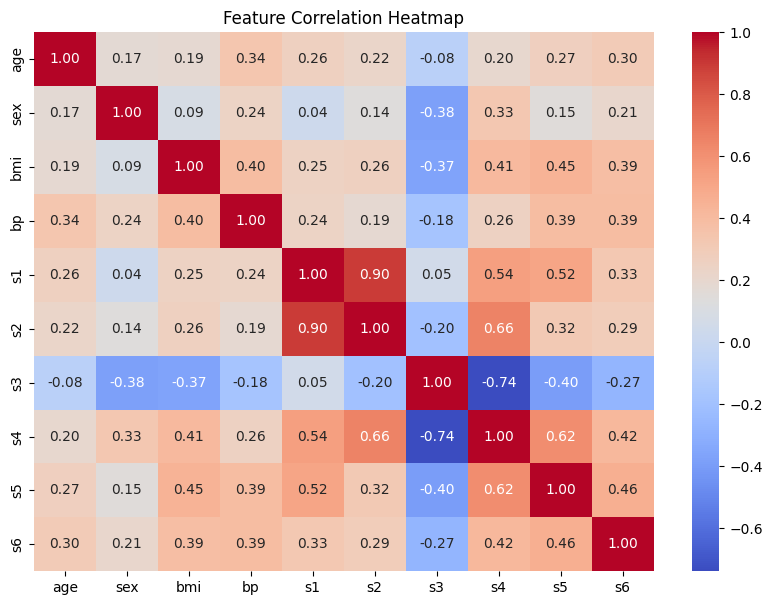

In [5]:
plt.figure(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression - Test RMSE: 53.85, R²: 0.453


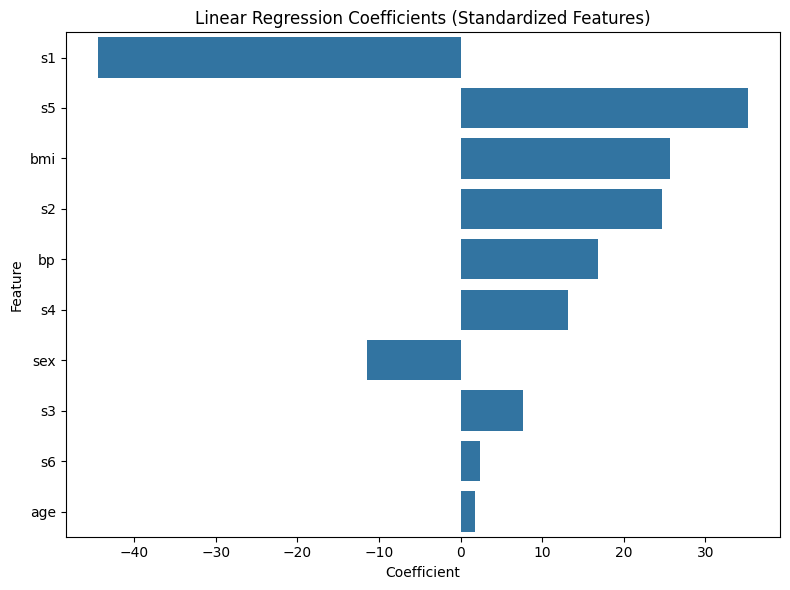

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
rmse_lin = root_mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression - Test RMSE: {rmse_lin:.2f}, R²: {r2_lin:.3f}")

lin_coeffs = pd.DataFrame({
    "feature": data.feature_names,
    "importance": lin_reg.coef_
}).sort_values("importance", key=np.abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=lin_coeffs, x="importance", y="feature")
plt.title("Linear Regression Coefficients (Standardized Features)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Random Forest - Test RMSE: 54.71, R²: 0.435


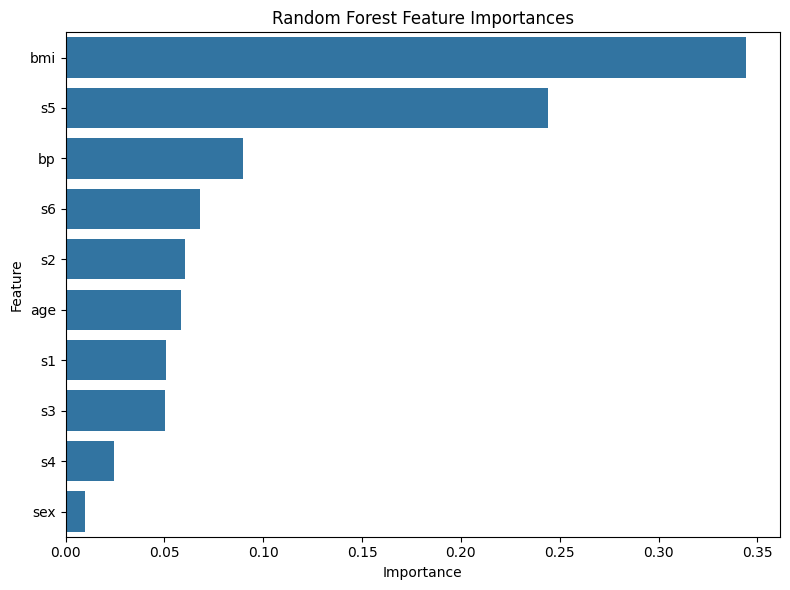

In [9]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Test RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")

rf_importances = pd.DataFrame({
    "feature": data.feature_names,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=rf_importances, x="importance", y="feature")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Gradient Boosting - Test RMSE: 53.84, R²: 0.453


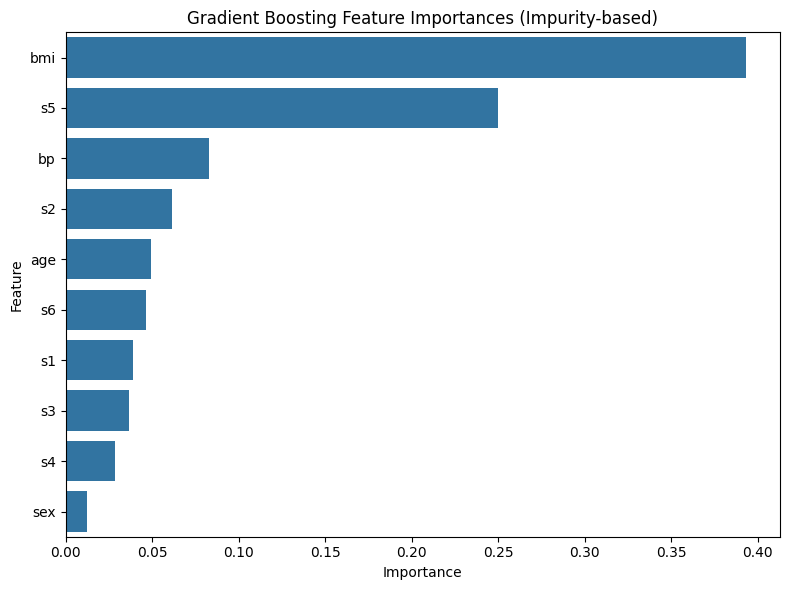

In [10]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
rmse_gbr = root_mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - Test RMSE: {rmse_gbr:.2f}, R²: {r2_gbr:.3f}")

gbr_importances = pd.DataFrame({
    "feature": data.feature_names,
    "importance": gbr.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=gbr_importances, x="importance", y="feature")
plt.title("Gradient Boosting Feature Importances (Impurity-based)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

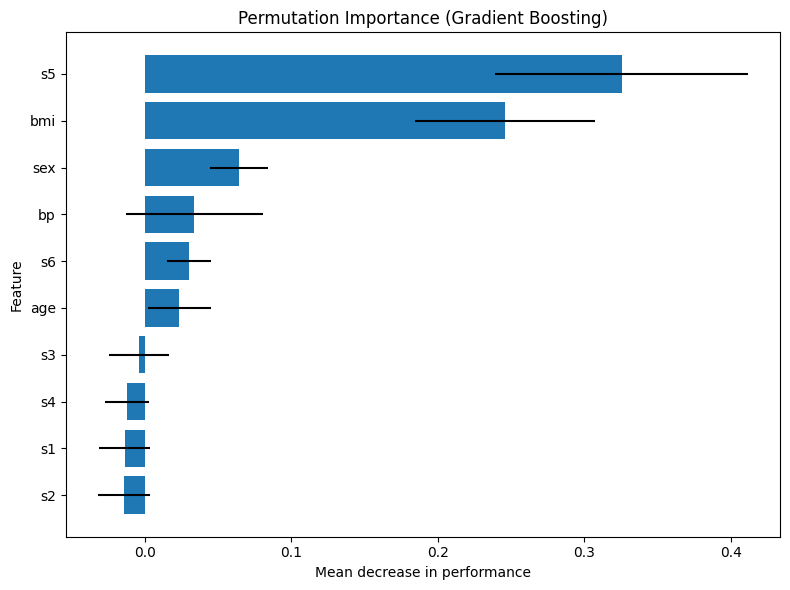

In [12]:
features = perm_importances["feature"]
imp_mean = perm_importances["importance_mean"]
imp_std  = perm_importances["importance_std"]

plt.figure(figsize=(8, 6))
plt.barh(features, imp_mean, xerr=imp_std)
plt.gca().invert_yaxis()  # so the most important feature is at the top
plt.title("Permutation Importance (Gradient Boosting)")
plt.xlabel("Mean decrease in performance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Top features for partial dependence plots: ['s5', 'bmi']


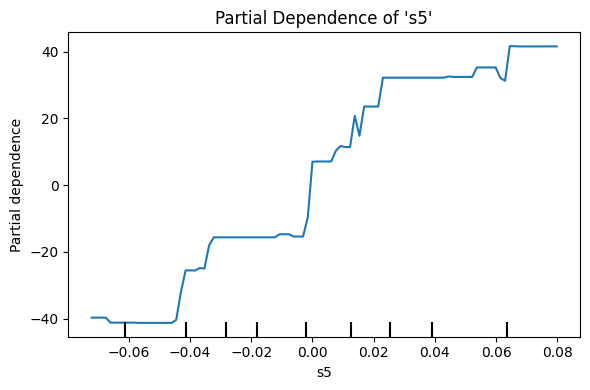

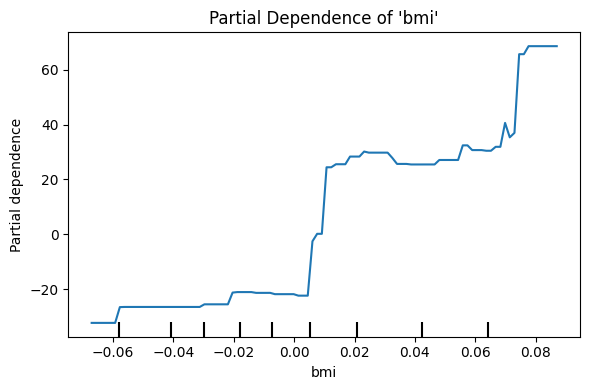

In [13]:
top_features = perm_importances["feature"].head(2).tolist()
print("\nTop features for partial dependence plots:", top_features)

for feat in top_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    PartialDependenceDisplay.from_estimator(
        gbr,
        X,
        [feat],
        ax=ax
    )
    plt.title(f"Partial Dependence of '{feat}'")
    plt.tight_layout()
    plt.show()